In [ ]:
import zipfile,os
import tensorflow as tf

local_zip = '/content/drive/My Drive/Colab Notebooks/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'


Membagi dataset menjadi Training set dan Validation set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range = 45, validation_split=0.4)

train_generator = train_datagen.flow_from_directory(base_dir, target_size=(150, 150), class_mode="categorical", subset='training') #training dataset
validation_generator = train_datagen.flow_from_directory(base_dir, target_size=(150, 150), class_mode="categorical", subset='validation') #validation dataset

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
ImageDataGenerator?

Membuat model multi-layer perceptron dengan Dropout

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Membuat model multi-layer perceptron tanpa Dropout

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

Melakukan training pada model dengan data yang ada

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(
      train_generator,
      steps_per_epoch=24,
      epochs=25,
      validation_data = validation_generator,
      validation_steps=16,
      verbose=2)

Epoch 1/25
24/24 - 43s - loss: 0.2735 - accuracy: 0.8958 - val_loss: 0.2502 - val_accuracy: 0.9082
Epoch 2/25
24/24 - 41s - loss: 0.2284 - accuracy: 0.9146 - val_loss: 0.3077 - val_accuracy: 0.8926
Epoch 3/25
24/24 - 41s - loss: 0.1932 - accuracy: 0.9377 - val_loss: 0.1853 - val_accuracy: 0.9277
Epoch 4/25
24/24 - 41s - loss: 0.2520 - accuracy: 0.9079 - val_loss: 0.2363 - val_accuracy: 0.9023
Epoch 5/25
24/24 - 44s - loss: 0.2175 - accuracy: 0.9255 - val_loss: 0.2398 - val_accuracy: 0.9141
Epoch 6/25
24/24 - 41s - loss: 0.1693 - accuracy: 0.9472 - val_loss: 0.5198 - val_accuracy: 0.8047
Epoch 7/25
24/24 - 42s - loss: 0.3929 - accuracy: 0.8509 - val_loss: 0.2955 - val_accuracy: 0.9004
Epoch 8/25
24/24 - 42s - loss: 0.1983 - accuracy: 0.9258 - val_loss: 0.1944 - val_accuracy: 0.9258
Epoch 9/25
24/24 - 42s - loss: 0.1888 - accuracy: 0.9310 - val_loss: 0.1859 - val_accuracy: 0.9258
Epoch 10/25
24/24 - 41s - loss: 0.1516 - accuracy: 0.9417 - val_loss: 0.1848 - val_accuracy: 0.9258
Epoch 11/

Grafik

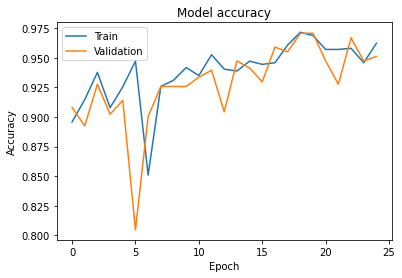

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Melakukan prediksi (1)

Saving images.jpg to images (2).jpg
paper


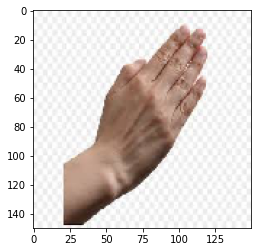

In [ ]:
from google.colab import files
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] ==1:
      print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')
  else:
    print('unknown')

Saving rock.png to rock (2).png
rock


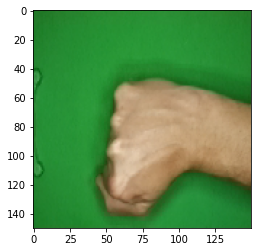

In [ ]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] ==1:
      print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')
  else:
    print('unknown')

Saving scissors.png to scissors (7).png
scissors


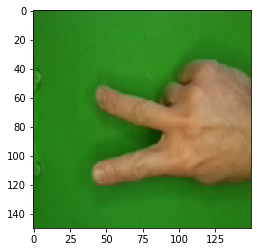

In [ ]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] ==1:
      print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')
  else:
    print('unknown')